# <center>Classification Trees</center>
## <center>Kirill Zakharov</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

Рассмотрим задачу бинарной классификации. Сгенерируем обучающую выборку и сохраним её в переменные `(train_data, train_labels)`. Каждый объект характеризуется парой признаков $x_1$ и $x_2$.

In [2]:
np.random.seed(67)
points = np.random.uniform(size=(20, 2), low=-1, high=1)
positive = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] >= 0)]
negative = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] < 0)]
train_data = np.vstack([positive, negative])
train_labels = np.hstack([np.ones(positive.shape[0]), np.zeros(negative.shape[0])])

In [3]:
train_data[:5]

array([[ 0.37178517, -0.33681636],
       [-0.57370028,  0.8650133 ],
       [ 0.4456366 , -0.90620939],
       [-0.91362246,  0.91001759],
       [-0.20464543,  0.05931678]])

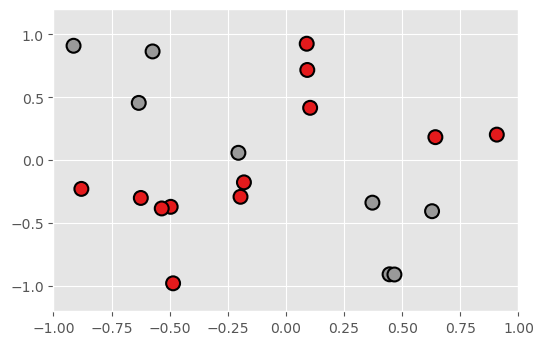

In [4]:
plt.subplots(dpi=100)

plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)

plt.show()

**Задание 1.** Выберите предикаты, по которым проводить разбиение. Постройте дерево решений для данной задачи. Какой глубины будет оптимальное дерево?

In [34]:
initial_pred = (0.12, 0.05)

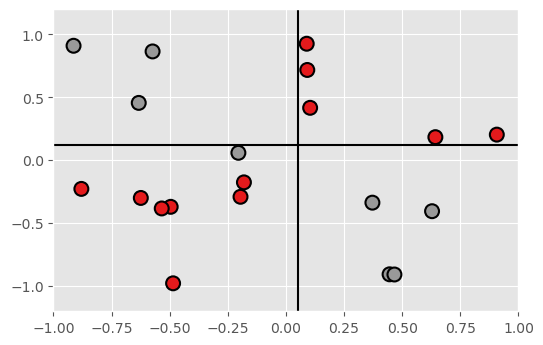

In [35]:
plt.subplots(dpi=100)

plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)

plt.hlines(initial_pred[0], -1, 1, color='black')
plt.vlines(initial_pred[1], -2, 2, color='black')
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)

plt.show()

In [40]:
XRight = train_data[train_data[:, 0] > initial_pred[0]]
XLeft = train_data[train_data[:, 0] <= initial_pred[0]]

yRight = train_labels[train_data[:, 0] > initial_pred[0]]
yLeft = train_labels[train_data[:, 0] <= initial_pred[0]]

In [41]:
yRight_up = yRight[XRight[:, 1] > 0]
yRight_down = yRight[XRight[:, 1] <= 0]

yLeft_up = yLeft[XLeft[:, 1] > 0]
yLeft_down = yLeft[XLeft[:, 1] <= 0]

**Задание 2.** При построении деревьев классификации используются различные критерии информативности. Сравните начальную энтропию и начальное значение критерия Джини в данной задаче.

$$S_0=-p log_2 p-(1-p)log_2(1-p)$$
$$G_0=1-p^2-(1-p)^2$$

In [42]:
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2(1-p) 

def gini(p):
    return 1-(p**2)-(1-p)**2

In [43]:
p1 = train_labels.sum()/len(train_labels)

In [44]:
e0, g0 = entropy(p1), gini(p1)
print(f'entropy: {e0}\ngini: {g0}')

entropy: 0.9709505944546686
gini: 0.48


**Задание 3.** Определите набор предикатов для данной задачи. Для этого напишите функцию, которая по значениям признака и целевой переменной возвращает список предикатов для выбранного признака. Получите все предикаты по **всем** признакам.

In [45]:
def predicates(x, y):
    all_preds = []
    for i in range(len(x)-1):
        if y[i] != y[i+1]:
            all_preds.append((x[i]+x[i+1])/2)
    return all_preds

In [46]:
data = pd.DataFrame(train_data, columns=['x1', 'x2'])
data['y'] = train_labels

In [47]:
df1 = data[['x1', 'y']].sort_values(by='x1')
df2 = data[['x2', 'y']].sort_values(by='x2')

In [48]:
pred_x1 = predicates(df1['x1'].values, df1['y'].values)
pred_x1

[-0.8968132995429501,
 -0.7566065949742614,
 -0.6287665022757317,
 -0.5990121190564968,
 -0.554037228654128,
 -0.34507990333227334,
 -0.2000711452800843,
 0.2378704257933334,
 0.6354743396903453]

In [49]:
pred_x2 = predicates(df2['x2'].values, df2['y'].values)
pred_x2

[-0.9427459061178219,
 -0.3937531883073182,
 -0.3533314885967552,
 -0.3180882719395066,
 -0.05808715883026605,
 0.12152788893462807,
 0.43647296726164697,
 0.5868539488442623,
 0.7913632606727191,
 0.9180910094600978]

**Задание 4.** Для каждого полученного в задании 3 предиката вычислите прирост информации (IG) по **критерию Джини**. Какое правило предлагает поместить в корень дерева указанный критерий? Проведите такое разбиение.

In [50]:
def gini(p):
    return 1-(p**2)-(1-p)**2

In [51]:
def best_predicates(array, n):
    pred = 0
    max_pred = 0
    
    for i in array:
        yRight = train_labels[train_data[:, n-1] > i]
        yLeft = train_labels[train_data[:, n-1] <= i]
        
        g1 = gini(sum(yRight)/len(yRight))
        g2 = gini(sum(yLeft)/len(yLeft))
        
        ig = 1 - g1*(len(yRight)/len(train_labels)) - g2*(len(yLeft)/len(train_labels))
        
        if ig > max_pred:
            max_pred = ig
            pred = i
            
    return pred

In [52]:
pred_x1 = best_predicates(pred_x1, 1)
pred_x1

0.2378704257933334

In [53]:
pred_x2 = best_predicates(pred_x2, 2)
pred_x2

-0.3937531883073182

**Задание 5.** Постройте решающее дерево той же глубины, что и в задании 1. С помощью полученного дерева классифицируйте объект с признаками (0.5, 0.3).

In [20]:
XRight = train_data[train_data[:, 0] > pred_x2]
XLeft = train_data[train_data[:, 0] <= pred_x2]

yRight = train_labels[train_data[:, 0] > pred_x2]
yLeft = train_labels[train_data[:, 0] <= pred_x2]

In [21]:
yRight1 = yRight[XRight[:, 1] > pred_x1]
yRight2 = yRight[XRight[:, 1] <= pred_x1]

yLeft1 = yLeft[XLeft[:, 1] > pred_x1]
yLeft2 = yLeft[XLeft[:, 1] <= pred_x1]

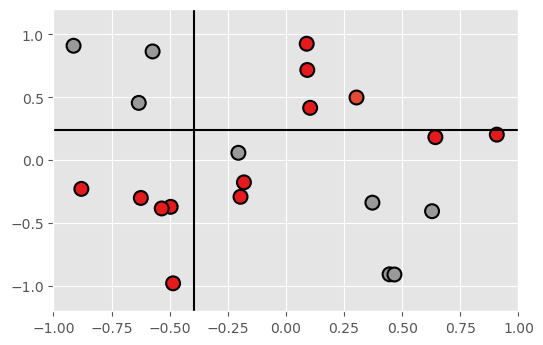

In [23]:
plt.subplots(dpi = 100)

plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)

plt.scatter(0.3, 0.5, s=100, edgecolors='black', linewidth=1.5)

plt.hlines(pred_x1, -2, 2, color='black')
plt.vlines(pred_x2, -2, 2, color='black')
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)

plt.show()